In [21]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [96]:
cars = pd.read_csv('cars_df.csv')

In [94]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [9]:
cars['Year_model'] = pd.to_numeric(cars.Year_model)

In [16]:
cars['Age'] = 2020- cars['Year_model'] 

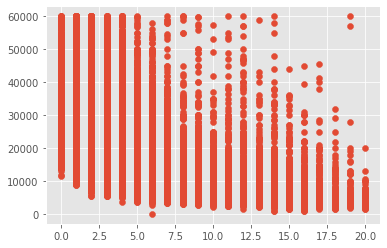

In [18]:
plt.scatter(cars['Age'],cars['Price'])

In [22]:
car_reg = linear_model.LinearRegression()

In [63]:
cars.Milage.std()
cars.isnull().sum(axis =0)
cars2 = cars.dropna(axis=0, how = 'any')
cars2.isnull().sum(axis =0)
cars2.reset_index(drop = True)

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8
...,...,...,...,...,...,...,...,...,...,...,...
38623,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4
38624,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3
38625,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1
38626,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5


In [54]:
car_reg.fit(cars2[['Age','Milage']],cars2.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
car_reg.coef_

array([-5.90368755e+02, -1.29054987e-01])

In [64]:
car_reg.intercept_

29303.41515180668

In [62]:
car_reg.predict([[4,49293.0]])

array([20580.4326448])

In [77]:
y = 'Toyota'
car_reg.fit(cars2[cars2['Make']== y][['Age','Milage']],cars2[cars2['Make'] == y].Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
car_reg.coef_

array([-7.52076601e+02, -6.52421518e-02])

In [85]:
dict_test = {}
dict_test['toyota'] = [car_reg.coef_[0], car_reg.coef_[1],car_reg.intercept_]

In [86]:
dict_test

{'toyota': [-752.0766007990475, -0.0652421517736819, 24965.7995406914]}

In [91]:
unique_makes = cars2.Make.unique()
make_coefs = {}
for i in range(len(unique_makes)):

    make = unique_makes[i]
    #print(make)
    #car_reg.fit(cars2[cars2['Make']== y][['Age','Milage']],cars2[cars2['Make'] == y].Price)
    car_reg.fit(cars2[cars2['Make']== make][['Age','Milage']],cars2[cars2['Make']== make].Price)
    make_coefs[make]= [car_reg.coef_[0], car_reg.coef_[1],car_reg.intercept_]

make_coefs
    

{'INFINITI': [-1493.7164861822807, -0.06195103991965417, 33191.862041494904],
 'Suzuki': [-344.2423484602017, -0.025727776894300666, 12549.669855896507],
 'Honda': [-825.5179499508549, -0.07012061588899887, 25020.70751050779],
 'Cadillac': [-1460.3835190165892, -0.1091931469789436, 38353.84717947203],
 'Land Rover': [-995.2514322279019, -0.18927860831599091, 45514.078093289136],
 'Nissan': [-423.992735672341, -0.08886322357519308, 20304.475509723332],
 'Mazda': [-908.1723244721676, -0.0839054918406866, 24917.104582588785],
 'BMW': [-1483.454320449099, -0.14740977509656322, 39980.906133438635],
 'Toyota': [-752.0766007990475, -0.0652421517736819, 24965.7995406914],
 'Saturn': [-631.7792213668937, -0.0486039037930457, 18409.098570938957],
 'GMC': [-1389.9847044316793, -0.06425681713302786, 33622.309766657156],
 'Chevrolet': [-691.1846949754613, -0.07959780683413974, 24847.030048519417],
 'Bentley': [-1956.4939436466566, -0.37991002120580786, 86078.45268199703],
 'Mercury': [-114.30162918

In [155]:
cars3 = pd.read_csv('cars2_df.csv')
cars3.isnull().sum(axis =0)
cars3 =  cars3.dropna(axis=0, how = 'any')


In [156]:
cars3.groupby('Make').count()['Listing']
cars3 = cars3[cars3.Make !='Ferrari']
cars3 = cars3[cars3.Make !='Rolls-Royce']


In [157]:
cars3.groupby('Make').count()['Listing']

Make
Acura             623
Alfa              104
Aston Martin       16
Audi             1534
BMW              2595
Bentley            33
Buick             729
Cadillac          977
Chevrolet        2531
Chrysler          875
Dodge            1763
FIAT              217
Fisker              4
Ford             3264
GMC              1003
Genesis           178
Honda            1626
Hummer            113
Hyundai          1858
INFINITI          809
Jaguar            313
Jeep             1050
Kia              1050
Land Rover        533
Lexus            1270
Lincoln           496
Lotus               6
MINI              305
Maserati          349
Mazda             692
Mercedes-Benz    1774
Mercury            73
Mitsubishi        168
Nissan           3632
Oldsmobile          5
Pontiac            85
Porsche           342
RAM               311
Saab               33
Saturn             47
Scion             166
Subaru            596
Suzuki             15
Tesla              48
Toyota           2547
Volks

In [158]:
car_reg.fit(cars3[cars3['Category']== 'Luxury Brand'][['Age','Milage']],cars3[cars3['Category']== 'Luxury Brand'].Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
car_reg.coef_

array([-1.02714843e+03, -1.43270329e-01])

In [160]:
car_reg.fit(cars3[cars3['Category']== 'Non-Luxury Brand'][['Age','Milage']],cars3[cars3['Category']== 'Non-Luxury Brand'].Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
car_reg.coef_

array([-6.76881360e+02, -8.76676782e-02])

In [162]:

#cars3 =cars3.reset_index(drop=True)
#cars3.groupby('Exterior_color').describe()
cars3 = cars3.iloc[:,1:13]
cars3

,Listing,Make,Year_model,Price,Milage,Exterior_color,Interior_color,Transmission,Drivetrain,City,Age,Category
0,2013 INFINITI JX35 Base,INFINITI,2013,13888.0,73953.0,White,Brown,CVT,AWD,New York City,7,Luxury Brand
1,2006 Suzuki Grand Vitara,Suzuki,2006,3995.0,121390.0,Red,Gray,Automatic,4x4/4-wheel drive,New York City,14,Non-Luxury Brand
2,2012 INFINITI FX50 Base,INFINITI,2012,13995.0,101158.0,Black,Black,Automatic,AWD,New York City,8,Luxury Brand
3,2012 Honda Odyssey EX-L,Honda,2012,10900.0,57070.0,Black,Gray,Automatic,FWD,New York City,8,Non-Luxury Brand
4,2012 INFINITI QX56 Base,INFINITI,2012,13495.0,137301.0,Silver,Gray,Automatic,4x4/4-wheel drive,New York City,8,Luxury Brand
...,...,...,...,...,...,...,...,...,...,...,...,...
38626,2016 Nissan Juke SL,Nissan,2016,15446.0,49293.0,Black,Black,CVT,AWD,Miami,4,Non-Luxury Brand
38627,2017 Ford Escape SE,Ford,2017,13990.0,31252.0,White,Gray,Automatic,FWD,Miami,3,Non-Luxury Brand
38628,2019 Volkswagen Atlas 3.6L V6 SE,Volkswagen,2019,25950.0,15349.0,Black,Black,Automatic,FWD,Miami,1,Non-Luxury Brand
38629,2015 Chevrolet Equinox 1LT,Chevrolet,2015,6590.0,140410.0,Black,Black,Automatic,FWD,Miami,5,Non-Luxury Brand


In [163]:
cars3.groupby('Exterior_color').agg(['count','mean','std'])

Year_model                        Price                \
                    count         mean       std count          mean   
Exterior_color                                                         
Beige                 285  2012.859649  4.719746   285  15389.228070   
Black                9602  2015.577796  3.420689  9602  22066.021558   
Blue                 3214  2015.158681  3.777630  3214  19556.832607   
Brown                 480  2014.127083  3.760926   480  18122.162500   
Gold                  176  2010.664773  4.880996   176  12368.687500   
Gray                 6460  2015.866873  3.261421  6460  20295.411146   
Green                 335  2012.764179  5.320385   335  15944.719403   
Orange                149  2014.959732  4.471953   149  19352.496644   
Other                 718  2014.906685  3.986159   718  19334.327298   
Pink                    1  2013.000000       NaN     1   4998.000000   
Purple                 45  2014.288889  4.382933    45  14836.288889   
Red                  2570  2015.094553  3.927031  2570  17628.528016   
Silver               5330  2015.331332  3.966620  5330  18529.060788   
White                9203  2016.042269  3.051905  9203  21609.402369   
Yellow                 58  2010.689655  5.079048    58  17418.603448   

                             Milage                               Age  \
                         std  count          mean           std count   
Exterior_color                                                          
Beige           10221.744037    285  65262.964912  41682.101574   285   
Black           11865.468847   9602  48287.372006  34172.331784  9602   
Blue            11544.495686   3214  49414.404480  36111.157342  3214   
Brown           10480.009605    480  61395.175000  38722.641237   480   
Gold             7419.398133    176  79312.926136  42492.240363   176   
Gray            11064.472185   6460  46373.802786  33599.497297  6460   
Green           10502.119195    335  66634.498507  45492.766842   335   
Orange          10739.975292    149  43047.617450  38448.604955   149   
Other           12339.836335    718  53372.856546  38771.721319   718   
Pink                     NaN      1  76702.000000           NaN     1   
Purple           7365.153913     45  60367.422222  43769.087090    45   
Red             10055.532483   2570  50827.528405  37782.362567  2570   
Silver          10571.434551   5330  50595.748030  37389.050933  5330   
White           11326.714088   9203  45242.388243  32986.062363  9203   
Yellow          11580.071531     58  74157.396552  43675.143484    58   

                                    
                    mean       std  
Exterior_color                      
Beige           7.140351  4.719746  
Black           4.422204  3.420689  
Blue            4.841319  3.777630  
Brown           5.872917  3.760926  
Gold            9.335227  4.880996  
Gray            4.133127  3.261421  
Green           7.235821  5.320385  
Orange          5.040268  4.471953  
Other           5.093315  3.986159  
Pink            7.000000       NaN  
Purple          5.711111  4.382933  
Red             4.905447  3.927031  
Silver          4.668668  3.966620  
White           3.957731  3.051905  
Yellow          9.310345  5.079048

In [164]:
cars3.Category.unique()

array(['Luxury Brand', 'Non-Luxury Brand'], dtype=object)